In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('heart_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
X = data.iloc[:,:-1].values
y = data.iloc[:,13].values

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)
X_train.shape

(212, 13)

In [12]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


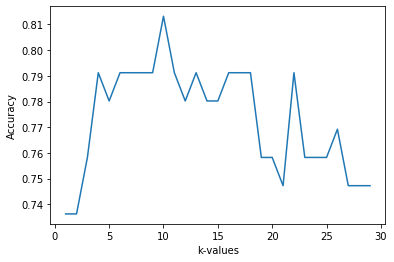

In [15]:
from sklearn.neighbors import KNeighborsClassifier
score_list=[]
for each in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))

plt.plot(range(1,30),score_list)
plt.xlabel("k-values")
plt.ylabel("Accuracy")
plt.show()

In [32]:
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1], dtype=int64)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.84      0.83        49\n           1       0.80      0.79      0.80        42\n\n    accuracy                           0.81        91\n   macro avg       0.81      0.81      0.81        91\nweighted avg       0.81      0.81      0.81        91\n'

In [34]:
confusion_matrix(y_test,y_pred)

array([[41,  8],
       [ 9, 33]], dtype=int64)

In [35]:
accuracy_score(y_test,y_pred)

0.8131868131868132